<a href="https://colab.research.google.com/github/dhwanipatel14/Comp-4730-Project-1/blob/master/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
#install keras
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import tensorflow as tf
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

In [ ]:
#import TensorFlow and MNIST dataset under the Keras API
mnist = tf.keras.datasets.mnist # 0-9, 28x28 images, 1 colour channel

In [ ]:
#load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [ ]:
print("Train dataset size: ", x_train.shape)
print("Test dataset size: ", x_test.shape)

Train dataset size:  (60000, 28, 28)
Test dataset size:  (10000, 28, 28)


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)   

# need to reshape the data as keras needs 4D datasets, and ours are 3D right now
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# new reshaped dataset
print(x_test.shape)
print(x_train.shape)


(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [ ]:
# build the model
model = tf.keras.models.Sequential() # most common model

# hidden layers
model.add(tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

# flattening the input layer
model.add(tf.keras.layers.Flatten()) 

# output layer
# last dense layer must have 10 neurons as we have 10 classes
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) 

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 129s 69ms/step - loss: 0.1601 - accuracy: 0.9522
Epoch 2/3
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0560 - accuracy: 0.9826
Epoch 3/3
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0386 - accuracy: 0.9879


In [ ]:
#Calcuate loss and accuracy
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])


loss= 0.04368426650762558
accuracy= 0.9865999817848206


In [ ]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(predictions) #probability
print(np.argmax(np.round(predictions[2])))

313/313 [==============================] - 6s 18ms/step
[[1.71734238e-09 2.18808860e-09 2.05574565e-06 ... 9.99995768e-01
  2.07297268e-09 8.98849208e-08]
 [6.10037423e-05 3.07534319e-05 9.99720812e-01 ... 1.80390440e-08
  1.30375665e-05 3.31740524e-09]
 [1.20124781e-08 9.99952376e-01 1.91727239e-08 ... 4.00937552e-06
  5.85889950e-07 9.11272025e-07]
 ...
 [4.49690146e-11 2.44204784e-07 8.82038539e-12 ... 1.40673887e-06
  3.79166227e-06 6.82983045e-06]
 [5.16519003e-06 2.06621187e-09 3.37930572e-08 ... 1.97763050e-09
  6.64419821e-03 2.98809459e-06]
 [4.24024802e-05 1.86335547e-09 3.06698576e-06 ... 1.55220614e-10
  6.81687607e-06 4.15028047e-08]]
1


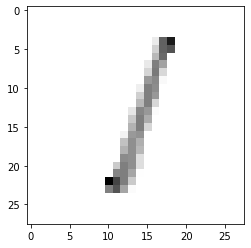

In [ ]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

**Summay of model**

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3200)              0         
                                                                 
 dense_19 (Dense)            (None, 10)              

17


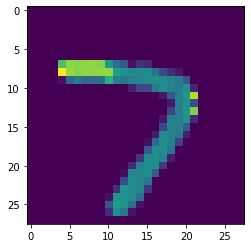

Model Prediction:  7
Paused - press ENTER to continue, q to exit: 
17


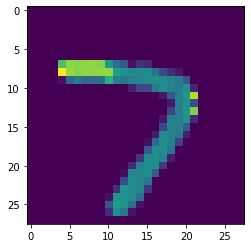

Model Prediction:  7
Paused - press ENTER to continue, q to exit: 
21


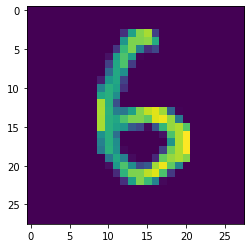

Model Prediction:  6
Paused - press ENTER to continue, q to exit: 
11


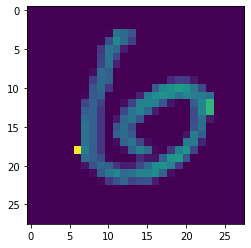

Model Prediction:  6
Paused - press ENTER to continue, q to exit: 
20


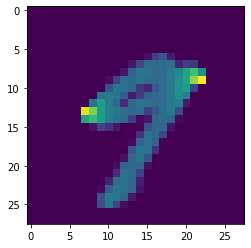

Model Prediction:  9
Paused - press ENTER to continue, q to exit: q


In [158]:
import random
import matplotlib.pyplot as plt

w, x, y, z = x_test.shape

while(1):
    
    # choose random sample from test dataset
    num1 = random.randint(0, x)
    print(num1)
    # show sample chosen
    
    plt.imshow(x_test[num1].reshape(28, 28))
    plt.show()
   
    
    # show model prediction
    print("Model Prediction: ", np.argmax(predictions[num1]))
    
    # Pause when 'q' is entered
    cont = input('Paused - press ENTER to continue, q to exit: ')
    if cont == 'q':
        break